In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
fhist = r.TFile("./data/results_full_histOnly_Crowded_9d.root")
#fhist = r.TFile("./data/crowded/gm2offline_ana_17366149_15930.00084.root")
fhist.cd("farline")
fhist.ls()

TFile**		./data/results_full_histOnly_Crowded_9d.root	
 TFile*		./data/results_full_histOnly_Crowded_9d.root	
  TDirectoryFile*		farline	farline (ReconComparisonEvWClusterSum) folder
   KEY: TH2D	evwEnergyEvW;1	EnergyEast vs. EnergyWest
   KEY: TH2D	counterHist;1	Number of Clusters Per Island in East and West
   KEY: TH2D	counterHistHighEnergy;1	Number of Clusters Per Island in East and West [All Clusters Above Energy Cutoff]
   KEY: TH2D	evwDeltaXDeltaY;1	Energy Weighted #deltaX vs. #deltaY
   KEY: TH2D	evwDeltaTCalo;1	Energy Weighted #deltaT
   KEY: TH1D	evwDeltaE;1	#deltaE (n:n Islands Only)
   KEY: TH1D	evwDeltaEAll;1	#deltaE (All Islands)
   KEY: TH2D	counterWestVsTime;1	Number of Clusters Per Island in Recon West vs. t_{west} (Max Energy)
   KEY: TH2D	counterEastVsTime;1	Number of Clusters Per Island in Recon East vs. t_{east} (Max Energy)
   KEY: TH3D	counterEastVsCounterWestVsTime;1	Number of Clusters Per Island in Recon East and West vs. t_{west} (Max Energy) [Only for N_{e/w}

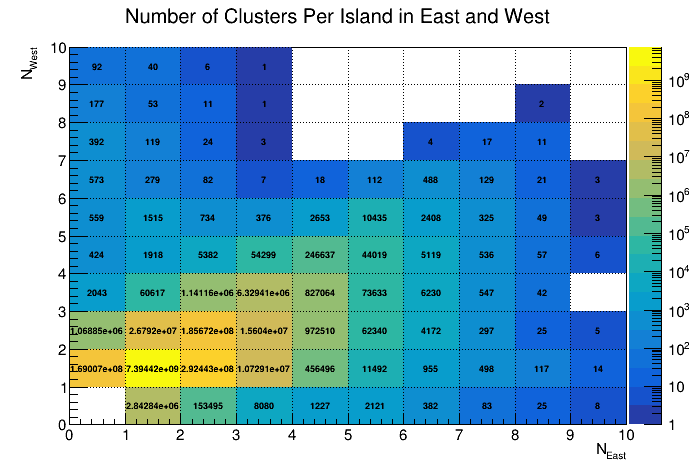

In [3]:
c = r.TCanvas()
counterHist = fhist.Get("farline").Get("counterHist").Clone()
counterHist.Draw("colz text")
counterHist.GetXaxis().SetRangeUser(0,10)
counterHist.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

In [7]:
ntotal = counterHist.GetEntries()
print(ntotal)
print((7.39442*10**9)/ntotal)

8109071963.0
0.9118700677141839


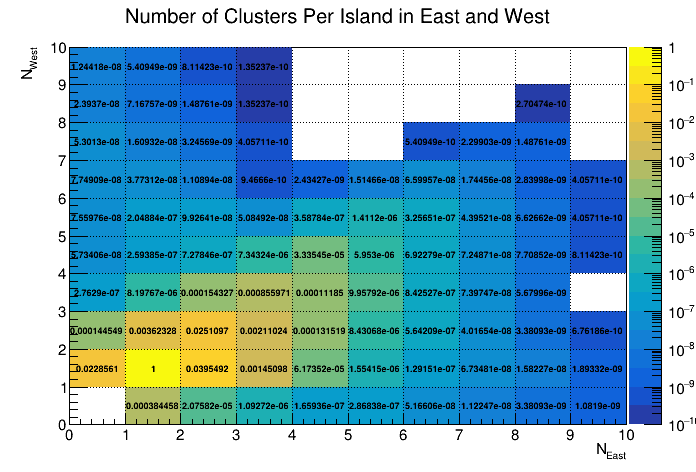

In [5]:
c = r.TCanvas()
counterHistScaled = counterHist.Clone("counterHistScaled")
counterHistScaled.Scale(1/counterHistScaled.GetBinContent(2,2)*1)
counterHistScaled.Draw("colz text")
counterHistScaled.GetXaxis().SetRangeUser(0,10)
counterHistScaled.GetYaxis().SetRangeUser(0,10)
counterHistScaled.GetZaxis().SetRangeUser(0.0000000001,1)
c.SetLogz()
c.SetGrid()
c.Draw()

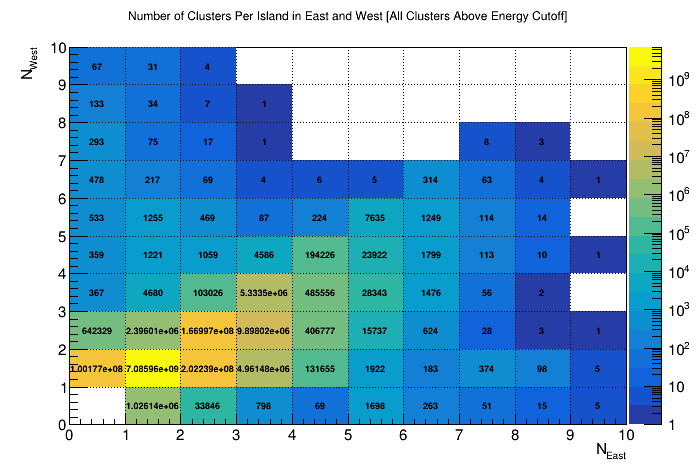

In [6]:
c = r.TCanvas()
counterHistHighEnergy = fhist.Get("farline").Get("counterHistHighEnergy").Clone()
counterHistHighEnergy.Draw("colz text")
counterHistHighEnergy.GetXaxis().SetRangeUser(0,10)
counterHistHighEnergy.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

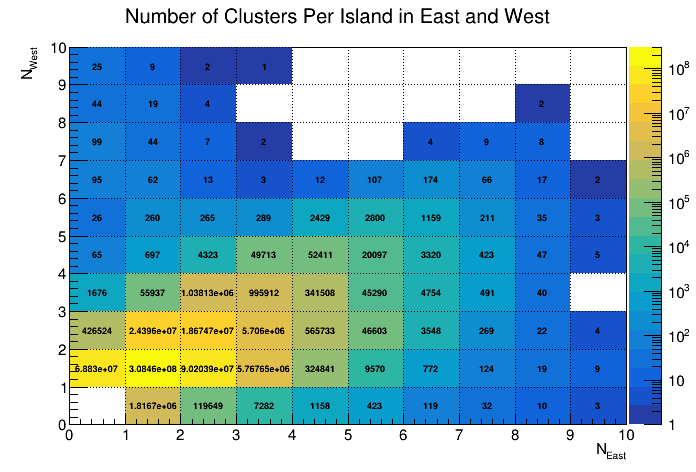

In [7]:
c = r.TCanvas()
counterHistLowEnergy = counterHist.Clone("counterHistLowEnergy")
counterHistLowEnergy.Add(counterHistHighEnergy, -1)
counterHistLowEnergy.Draw("colz text")
counterHistLowEnergy.GetXaxis().SetRangeUser(0,10)
counterHistLowEnergy.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  3.55345e+11
NDf                       =       109962
Edm                       =  9.27689e-08
NCalls                    =           37
p0                        =            0                      	 (fixed)
p1                        =      1.10154   +/-   0.000156169 


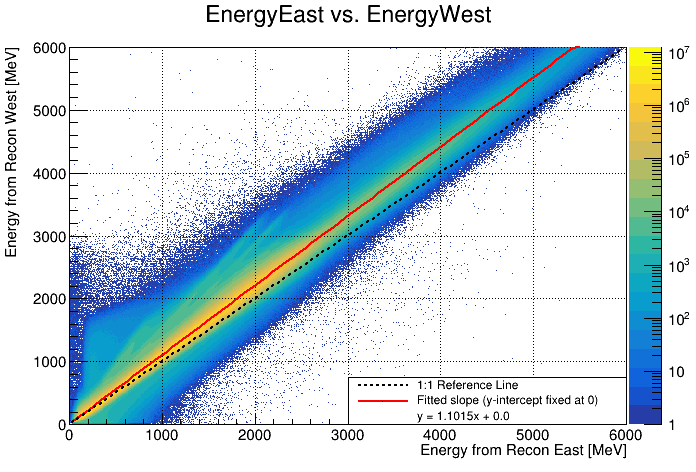

In [10]:
r.gStyle.SetOptFit(0)

c = r.TCanvas()
evwEnergyEvW = fhist.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.Draw("colz")


onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,6000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.5,0.1,0.9,0.2)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+"x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c.SetLogz()
c.SetGrid()
c.Draw()

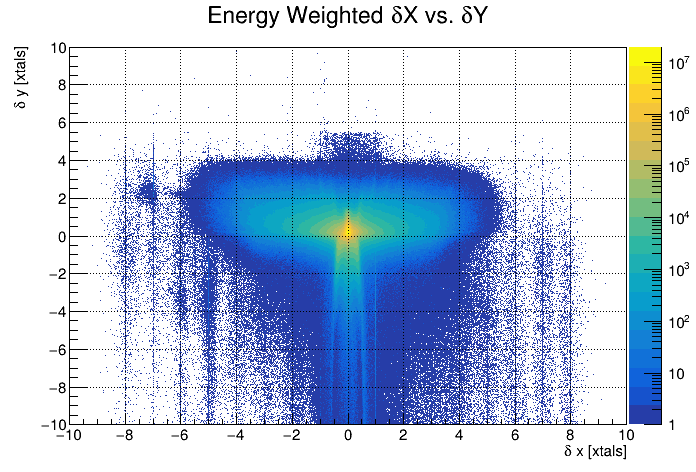

In [9]:
c = r.TCanvas()
evwDeltaXDeltaY = fhist.Get("farline").Get("evwDeltaXDeltaY").Clone()
evwDeltaXDeltaY.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

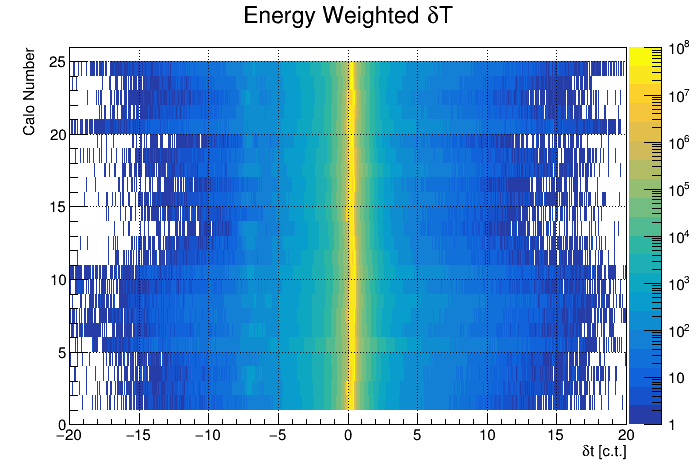

In [10]:
c = r.TCanvas()
evwDeltaTCalo = fhist.Get("farline").Get("evwDeltaTCalo").Clone()
evwDeltaTCalo.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

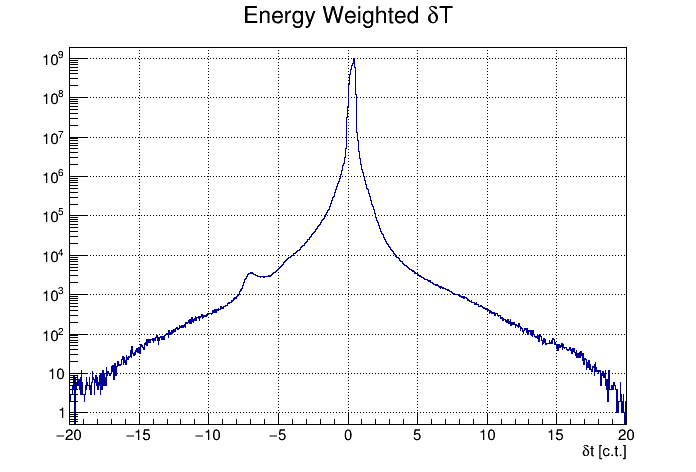

In [11]:
c = r.TCanvas()
evwDeltaTCalo.ProjectionX().Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

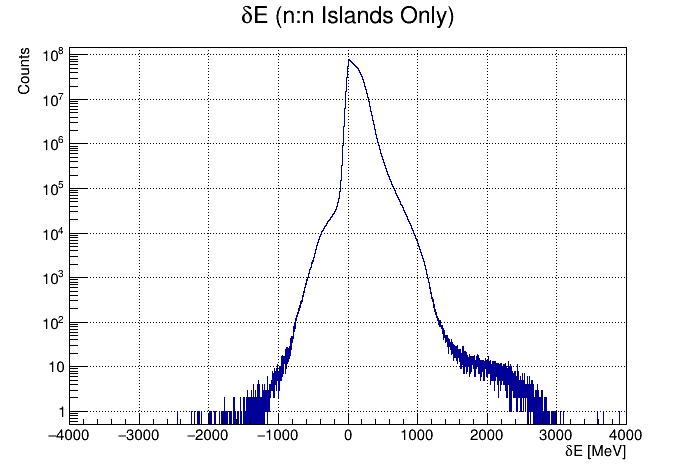

In [12]:
c = r.TCanvas()
evwDeltaE = fhist.Get("farline").Get("evwDeltaE").Clone()
evwDeltaE.Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

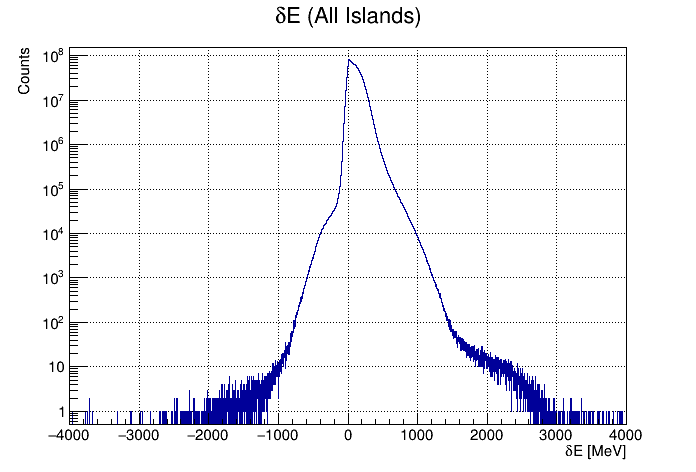

In [13]:
c = r.TCanvas()
evwDeltaEAll = fhist.Get("farline").Get("evwDeltaEAll").Clone()
evwDeltaEAll.Draw("colz")
c.SetLogy()
c.SetGrid()
c.Draw()

In [14]:
evwDeltaEAllScaled = evwDeltaEAll.Clone("evwDeltaEAllScaled")
evwDeltaEAllScaled.Scale(1/(evwDeltaEAllScaled.GetEntries()))
evwDeltaEScaled = evwDeltaE.Clone("evwDeltaEScaled")
evwDeltaEScaled.Scale(1/(evwDeltaEScaled.GetEntries()))

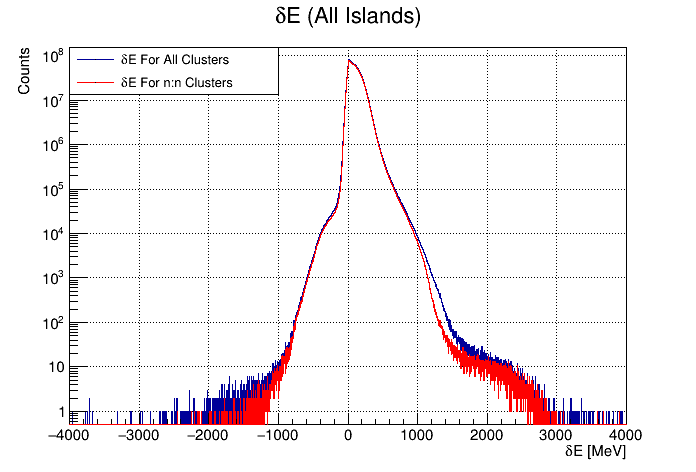

In [15]:
c = r.TCanvas()
evwDeltaEAll.Draw("")
evwDeltaEAll.GetXaxis().SetRangeUser(-4000,4000)
evwDeltaE.SetLineColor(2)
evwDeltaE.Draw("same")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.1,0.8,0.4,0.9)
leg.AddEntry(evwDeltaEAll, "#deltaE For All Clusters")
leg.AddEntry(evwDeltaE, "#deltaE For n:n Clusters")
leg.Draw()

c.Draw()

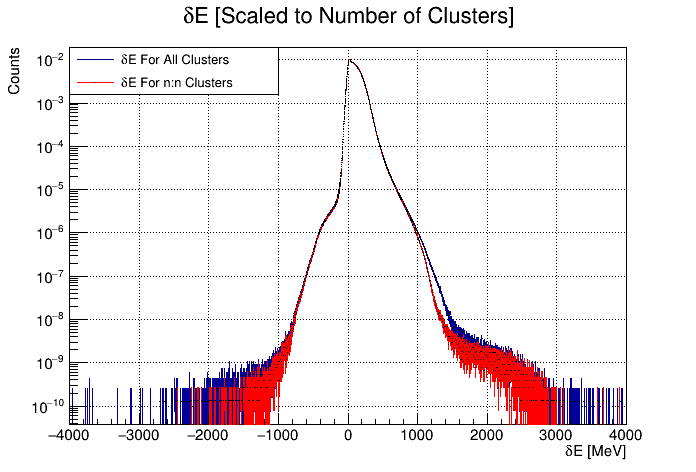

In [16]:
c = r.TCanvas()
evwDeltaEAllScaled.Draw("")
evwDeltaEAllScaled.GetXaxis().SetRangeUser(-4000,4000)
evwDeltaEAllScaled.SetTitle("#deltaE [Scaled to Number of Clusters]")
evwDeltaEScaled.SetLineColor(2)
evwDeltaEScaled.Draw("same")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.1,0.8,0.4,0.9)
leg.AddEntry(evwDeltaEAllScaled, "#deltaE For All Clusters")
leg.AddEntry(evwDeltaEScaled, "#deltaE For n:n Clusters")
leg.Draw()

c.Draw()

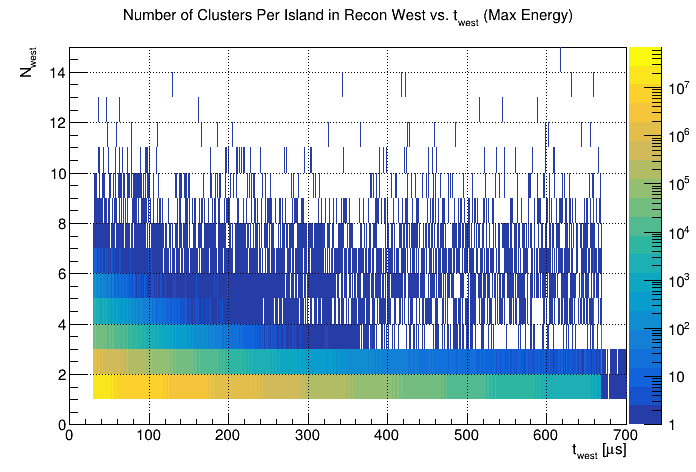

In [22]:
c = r.TCanvas()
counterWestVsTime = fhist.Get("farline").Get("counterWestVsTime")
counterWestVsTime.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

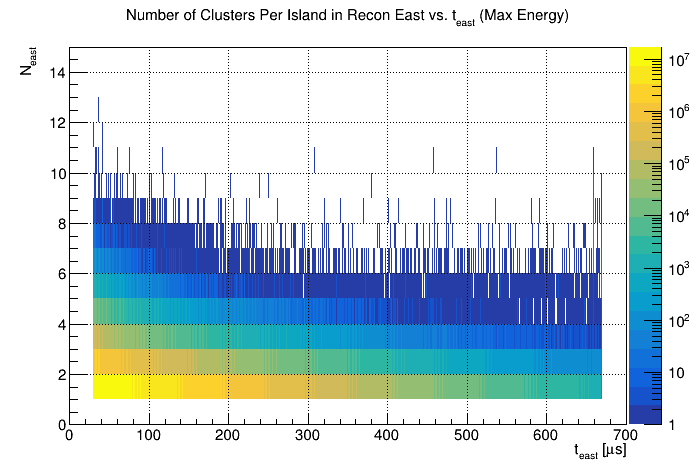

In [23]:
c = r.TCanvas()
counterEastVsTime = fhist.Get("farline").Get("counterEastVsTime")
counterEastVsTime.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

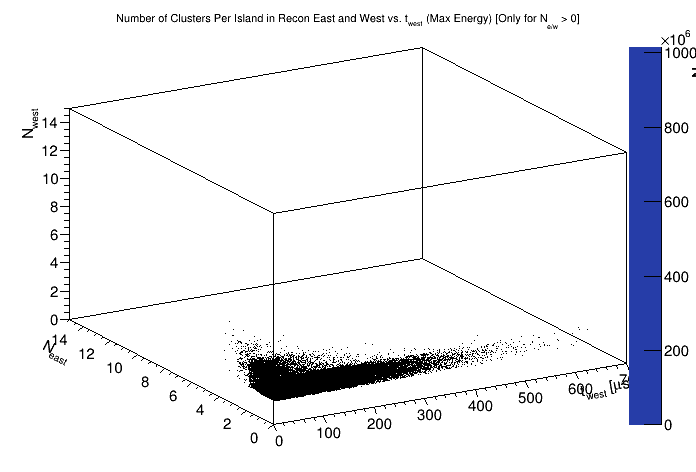

In [27]:
c = r.TCanvas()
counterEastVsCounterWestVsTime = fhist.Get("farline").Get("counterEastVsCounterWestVsTime")
counterEastVsCounterWestVsTime.Draw("")
#c.SetLogz()
c.Draw()